In [55]:
import numpy as np
import matplotlib.pyplot as plt

from import_data import import_dataset

dir_name = "SIX"
X = import_dataset(dir_name)
print(X)

['2021-01-02.txt', '2021-01-16.txt', '2021-01-17.txt', '2021-01-03.txt', '2021-01-15.txt', '2021-01-01.txt', '2021-01-29.txt', '2021-01-28.txt', '2021-01-14.txt', '2021-01-10.txt', '2021-01-04.txt', '2021-01-05.txt', '2021-01-11.txt', '2021-01-07.txt', '2021-01-13.txt', '2021-01-12.txt', '2021-01-06.txt', '2021-01-23.txt', '2021-01-22.txt', '2021-01-20.txt', '2021-01-08.txt', '2021-01-09.txt', '2021-01-21.txt', '2021-01-19.txt', '2021-01-31.txt', '2021-01-25.txt', '2021-01-24.txt', '2021-01-30.txt', '2021-01-18.txt', '2021-01-26.txt', '2021-01-27.txt']
[[1.51527678e+12 1.52738971e+12 1.53714629e+12 ... 1.43980325e+12
  1.43782398e+12 1.45510261e+12]
 [1.46532643e+12 1.49461513e+12 1.50579209e+12 ... 1.49707436e+12
  1.51711947e+12 1.51625420e+12]
 [1.47382745e+12 1.57635923e+12 1.54705399e+12 ... 1.50284597e+12
  1.52462025e+12 1.53531922e+12]
 ...
 [1.52868434e+12 1.56847952e+12 1.56136004e+12 ... 1.45574578e+12
  1.46353854e+12 1.47369373e+12]
 [1.48506259e+12 1.53948510e+12 1.526286

The first day of the month

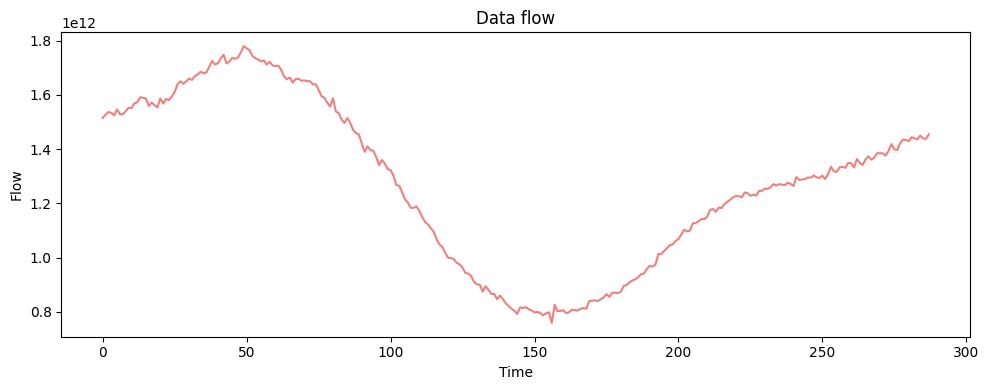

In [47]:
plt.figure(figsize=(10,4))
plt.plot(X[0], color="lightcoral")
plt.title("Data flow")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.tight_layout()
plt.show()

All month traffic 

(8928, 1)


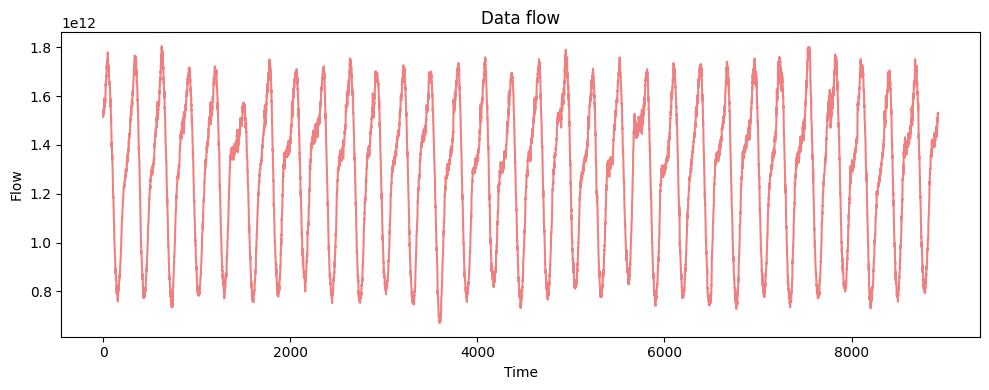

In [2]:
# All month on one image
import matplotlib.pyplot as plt 
from import_data import import_dataset


dir_name = "SIX"
X = import_dataset(dir_name)

X_r = X.reshape(-1, 1)
print(X_r.shape)

plt.figure(figsize=(10,4))
plt.plot(X_r, color="lightcoral")
plt.title("Data flow")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.tight_layout()
plt.show()

['2021-01-02.txt', '2021-01-16.txt', '2021-01-17.txt', '2021-01-03.txt', '2021-01-15.txt', '2021-01-01.txt', '2021-01-29.txt', '2021-01-28.txt', '2021-01-14.txt', '2021-01-10.txt', '2021-01-04.txt', '2021-01-05.txt', '2021-01-11.txt', '2021-01-07.txt', '2021-01-13.txt', '2021-01-12.txt', '2021-01-06.txt', '2021-01-23.txt', '2021-01-22.txt', '2021-01-20.txt', '2021-01-08.txt', '2021-01-09.txt', '2021-01-21.txt', '2021-01-19.txt', '2021-01-31.txt', '2021-01-25.txt', '2021-01-24.txt', '2021-01-30.txt', '2021-01-18.txt', '2021-01-26.txt', '2021-01-27.txt']


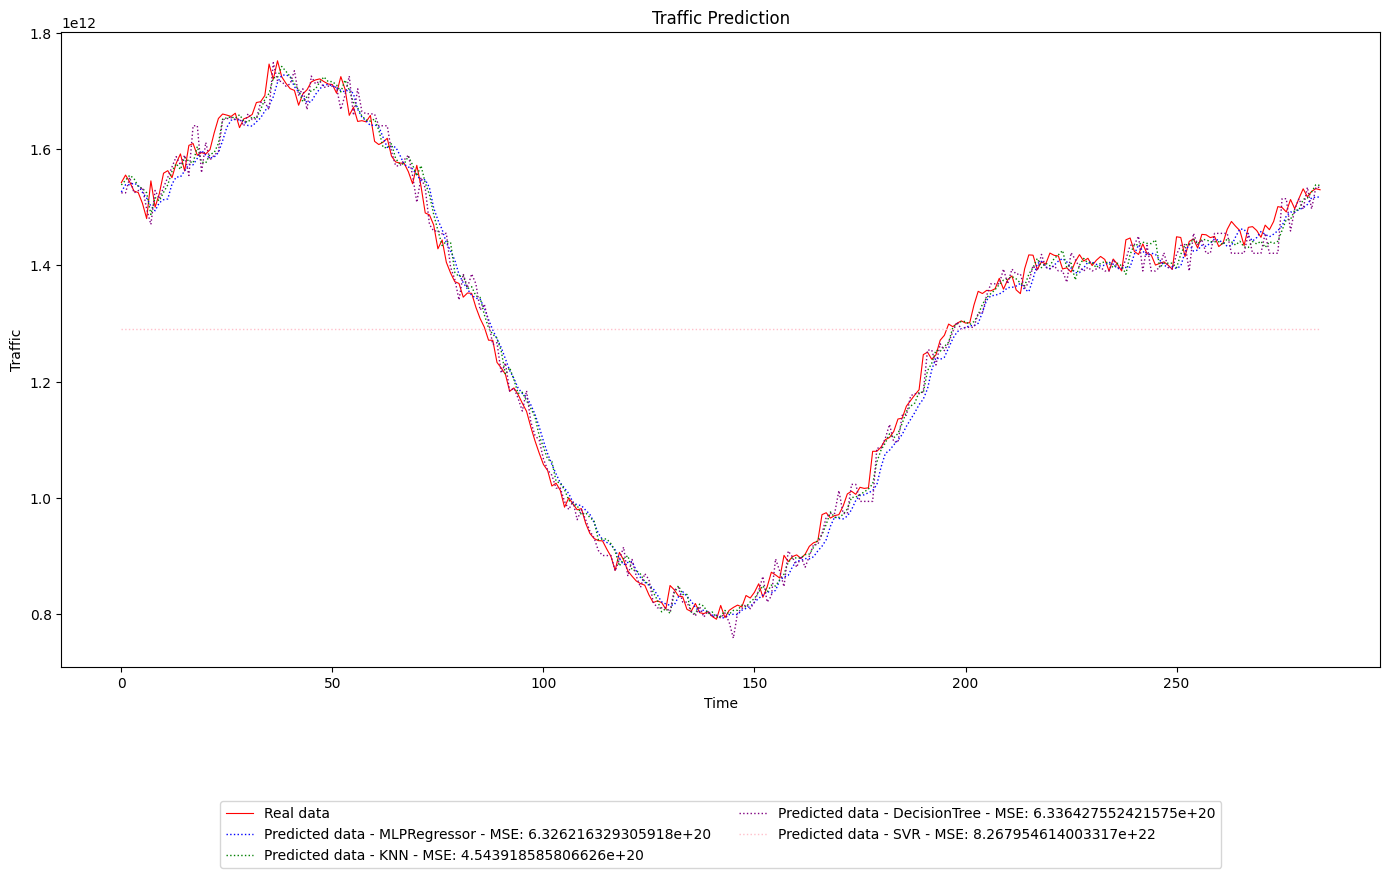

In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

from split_data import split_sequence
import warnings 

SEED = 42

warnings.filterwarnings("ignore")

n_steps = 3

colors = ["blue", "green", "purple", "pink"]

classifiers = {
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(4,), activation='identity', max_iter=1000, warm_start=True, early_stopping=True, random_state=SEED),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=SEED),
    "SVR": SVR()
}

dir_name = "SIX"
X_all = import_dataset(dir_name)

X, y = split_sequence(X_all[0],  n_steps=n_steps)
X_test, y_test = split_sequence(X_all[30], n_steps=n_steps)

plt.figure(figsize=(14,9))
plt.plot(y_test, label="Real data", color="red", linewidth=0.8)

for clf_id, clf_name in enumerate(classifiers):
    model = classifiers[clf_name].fit(X, y)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred) 

    plt.plot(pred, label=f"Predicted data - {clf_name} - MSE: {mse}", color = colors[clf_id], linewidth=1, linestyle="dotted")
    plt.title("Traffic Prediction")
    plt.xlabel("Time")
    plt.ylabel("Traffic")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.tight_layout()
plt.show()
